<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parse-raw-data-to-2D-conc.-matrices,-a-source-vector,-a-time-vector-and-a-distance-vector,-and-put-these-in-their-own-folder" data-toc-modified-id="Parse-raw-data-to-2D-conc.-matrices,-a-source-vector,-a-time-vector-and-a-distance-vector,-and-put-these-in-their-own-folder-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parse raw data to 2D conc. matrices, a source vector, a time vector and a distance vector, and put these in their own folder</a></span></li><li><span><a href="#Find-RMS-minimizing-D-for-each-folder" data-toc-modified-id="Find-RMS-minimizing-D-for-each-folder-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Find RMS-minimizing D for each folder</a></span></li><li><span><a href="#Plot-results" data-toc-modified-id="Plot-results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot results</a></span></li></ul></div>

In [ ]:
import TGdiffusion_convolution_fitting as cs
import parsingTG as ptg

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
from os import listdir
from glob import glob
from itertools import product
from tqdm import tqdm

In [ ]:
rawdatafolder = "../data/linerois_all/"
parseddatafolder = "../data/parsed/"
resultsfolder = "../data/results/"

# Parsing the data

Parse raw data to 2D conc. matrices, a source vector, a time vector and a distance vector, and put these in their own folder

In [33]:
animalsidecombos = ['_'.join(p) for p in product(["a1", "a2", "a3", "a4"], ["left", "right"])]

for animalsidecombo in animalsidecombos:
    print(f"parsing {animalsidecombo}... ")
    (conc_matrix, source_vector, time_vector,
     distance_vector) = ptg.parseanimalside(
        rawdatafolder,
        parseddatafolder + "SAS_source/",
        animalsidecombo,
        pixelsize_mm=0.078,
        frameduration_h=1.0/60.0,
        num_pixels_to_average_source_over=1,
    )

parsing a1_left... 


KeyboardInterrupt: 

In [ ]:
imp.reload(ptg)

<module 'parsingTG' from '/Users/lgn148/Documents/GitHub/TG-Diffusion/TG-Diffusion/src/parsingTG.py'>

parsing a1_left... 


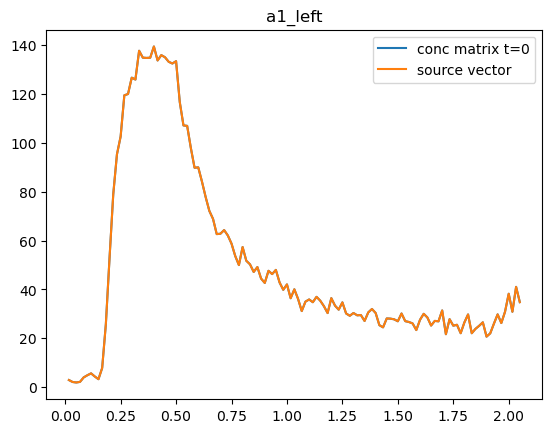

parsing a1_right... 


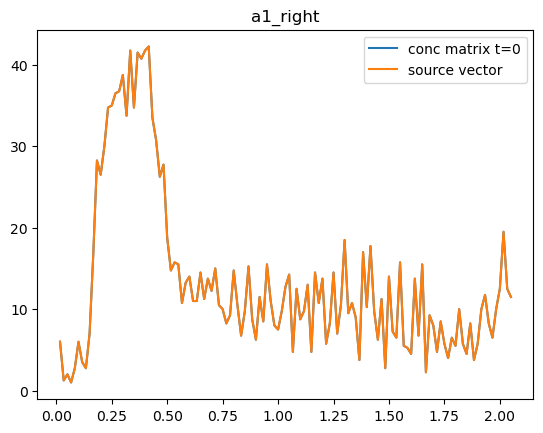

parsing a2_left... 


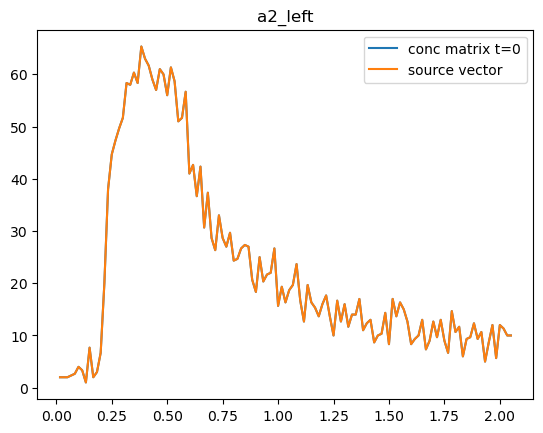

parsing a2_right... 


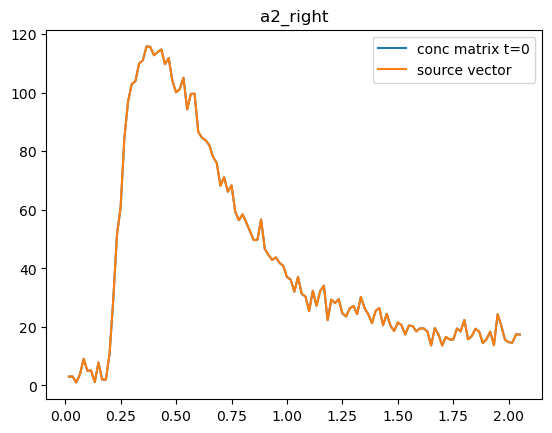

parsing a3_left... 


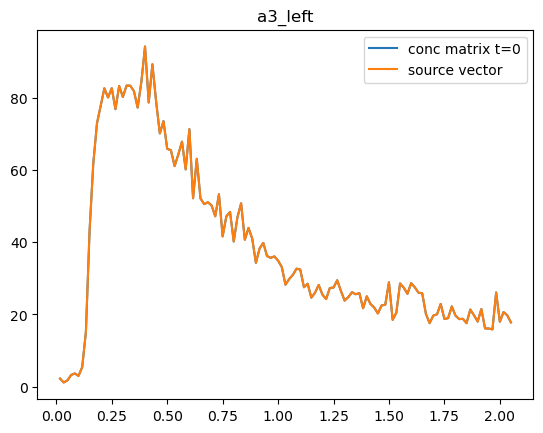

parsing a3_right... 


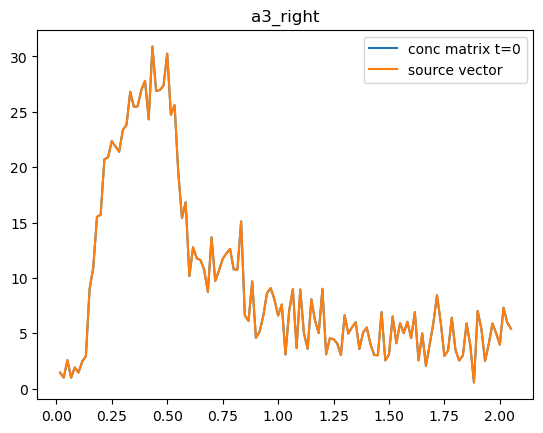

parsing a4_left... 


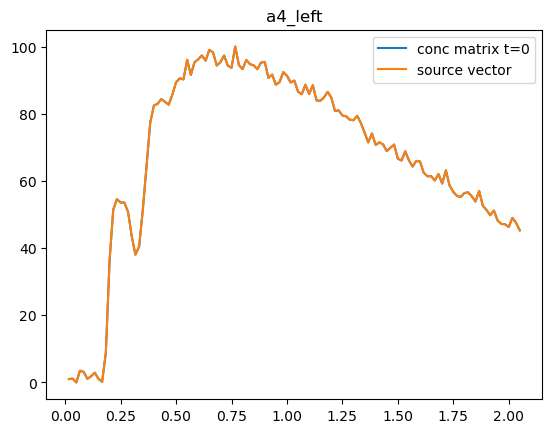

parsing a4_right... 


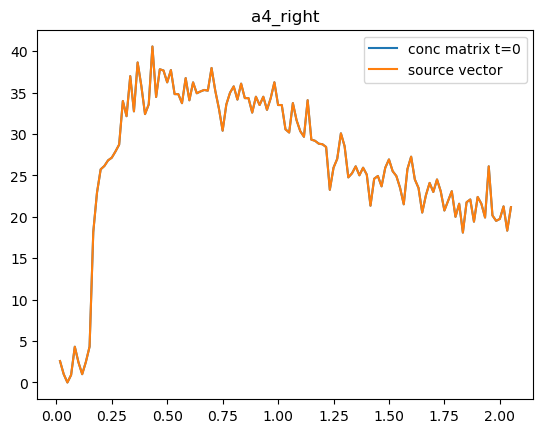

In [ ]:
animalsidecombos = ['_'.join(p) for p in product(["a1", "a2", "a3", "a4"], ["left", "right"])]

for animalsidecombo in animalsidecombos:
    print(f"parsing {animalsidecombo}... ")
    (conc_matrix, source_vector, time_vector,
     distance_vector) = ptg.parseanimalside(
        rawdatafolder,
        parseddatafolder + "TG_source/",
        animalsidecombo,
        pixelsize_mm=0.078,
        frameduration_h=1.0/60.0,
        num_pixels_to_average_source_over=1,
        source_is_SAS=False,
    )

## Find RMS-minimizing D for each folder

In [ ]:
import imp

imp.reload(ptg)
imp.reload(cs)

<module 'TGdiffusion_convolution_fitting' from '/Users/lgn148/Documents/GitHub/TG-Diffusion/TG-Diffusion/src/TGdiffusion_convolution_fitting.py'>

In [ ]:
resultsdict = dict()
minresults = []
lam = 0.01
subsampleskipsteps = 2
maxiter = 50

parsedfolders = glob(parseddatafolder  + "SAS_source/" + '*', recursive=True)

for folder in tqdm(parsedfolders):
    print("Finding best D for folder", folder, ". ", end="")
    
    try:
        D, RMS, identifier, minresult = cs.find_RMS_minimizing_D_for_data_in_folder(
            folder,
            lam,
            subsampleskipsteps,
            maxiter
        )

        resultsdict[identifier] = (identifier, D, RMS)
        minresults.append(minresult)
        print("success: ", minresult.success)
        
    except ValueError as ve:
        print(ve)

resultsdf = pd.DataFrame.from_dict(resultsdict, orient='index', columns=["ID", "D", "error"])
resultsdf.to_csv(resultsfolder + f'results_with_lam_{lam}.csv', index=False)

  0%|          | 0/8 [00:00<?, ?it/s]/Users/lgn148/Documents/GitHub/TG-Diffusion/TG-Diffusion/src/TGdiffusion_convolution_fitting.py:35: RuntimeWarning: divide by zero encountered in true_divide
  denom = np.sqrt(4 * np.pi * D * t**3)
/Users/lgn148/Documents/GitHub/TG-Diffusion/TG-Diffusion/src/TGdiffusion_convolution_fitting.py:38: RuntimeWarning: invalid value encountered in true_divide
  


Finding best D for folder ../data/parsed/a1_left . 

 12%|█▎        | 1/8 [08:30<59:31, 510.15s/it]

success:  True
Finding best D for folder ../data/parsed/a3_left . 

 25%|██▌       | 2/8 [17:01<51:05, 510.98s/it]

success:  True
Finding best D for folder ../data/parsed/a1_right . 

 38%|███▊      | 3/8 [25:30<42:30, 510.17s/it]

success:  True
Finding best D for folder ../data/parsed/a2_left . 

 50%|█████     | 4/8 [32:21<31:22, 470.72s/it]

success:  True
Finding best D for folder ../data/parsed/a3_right . 

 62%|██████▎   | 5/8 [40:04<23:24, 468.22s/it]

success:  True
Finding best D for folder ../data/parsed/a4_right . 

 75%|███████▌  | 6/8 [48:58<16:20, 490.36s/it]

success:  True
Finding best D for folder ../data/parsed/a4_left . 

 88%|████████▊ | 7/8 [57:00<08:07, 487.69s/it]

success:  True
Finding best D for folder ../data/parsed/a2_right . 

100%|██████████| 8/8 [1:05:27<00:00, 490.92s/it]

success:  True


In [60]:
imp.reload(cs)

<module 'TGdiffusion_convolution_fitting' from '/Users/lgn148/Documents/GitHub/TG-Diffusion/TG-Diffusion/src/TGdiffusion_convolution_fitting.py'>

In [61]:
resultsdict = dict()
minresults = []
lam = 0.01
subsampleskipsteps = 10
maxiter = 50

parsedfolders = glob(parseddatafolder  + "TG_source/" + '*', recursive=True)

for folder in tqdm(parsedfolders):
    print("Finding best D for folder", folder, ". ", end="")
    
    try:
        D, RMS, identifier, minresult = cs.find_RMS_minimizing_D_for_data_in_folder(
            folder,
            lam,
            subsampleskipsteps,
            maxiter
        )

        resultsdict[identifier] = (identifier, D, RMS)
        minresults.append(minresult)
        print("success: ", minresult.success)
        
    except ValueError as ve:
        #print(ve)
        raise ve

resultsdf = pd.DataFrame.from_dict(resultsdict, orient='index', columns=["ID", "D", "error"])
resultsdf.to_csv(resultsfolder + "TG_source/" + f'results_with_lam_{lam}.csv', index=False)

  0%|          | 0/8 [00:00<?, ?it/s]/Users/lgn148/Documents/GitHub/TG-Diffusion/TG-Diffusion/src/TGdiffusion_convolution_fitting.py:35: RuntimeWarning: divide by zero encountered in true_divide
  num = x * np.exp(-np.square(x) / (4 * D * t))
/Users/lgn148/Documents/GitHub/TG-Diffusion/TG-Diffusion/src/TGdiffusion_convolution_fitting.py:38: RuntimeWarning: invalid value encountered in true_divide
  return num / denom


Finding best D for folder ../data/parsed/TG_source/a1_left . 

 12%|█▎        | 1/8 [00:52<06:05, 52.23s/it]

success:  True
Finding best D for folder ../data/parsed/TG_source/a3_left . 

 25%|██▌       | 2/8 [01:42<05:07, 51.23s/it]

success:  True
Finding best D for folder ../data/parsed/TG_source/a1_right . 

 38%|███▊      | 3/8 [02:31<04:11, 50.29s/it]

success:  True
Finding best D for folder ../data/parsed/TG_source/a2_left . 

 50%|█████     | 4/8 [03:25<03:26, 51.69s/it]

success:  True
Finding best D for folder ../data/parsed/TG_source/a3_right . 

 62%|██████▎   | 5/8 [04:18<02:36, 52.05s/it]

success:  True
Finding best D for folder ../data/parsed/TG_source/a4_right . 

 75%|███████▌  | 6/8 [05:05<01:40, 50.44s/it]

success:  True
Finding best D for folder ../data/parsed/TG_source/a4_left . 

 88%|████████▊ | 7/8 [05:51<00:49, 49.04s/it]

success:  True
Finding best D for folder ../data/parsed/TG_source/a2_right . 

100%|██████████| 8/8 [06:42<00:00, 50.35s/it]

success:  True


## Plot results

In [49]:
resultsdf

,ID,D,error
a1_left,a1_left,0.103236,15.439480
a3_left,a3_left,0.045332,11.157700
a1_right,a1_right,0.307539,3.445178
a2_left,a2_left,0.293481,5.885471
a3_right,a3_right,0.213221,3.052305
a4_right,a4_right,0.105544,5.693303
a4_left,a4_left,0.111704,13.662220
a2_right,a2_right,0.086051,14.921296


In [65]:
resultsdf

,ID,D,error
a1_left,a1_left,0.103236,15.439480
a3_left,a3_left,0.045332,11.157700
a1_right,a1_right,0.307539,3.445178
a2_left,a2_left,0.293481,5.885471
a3_right,a3_right,0.213221,3.052305
a4_right,a4_right,0.105544,5.693303
a4_left,a4_left,0.111704,13.662220
a2_right,a2_right,0.086051,14.921296


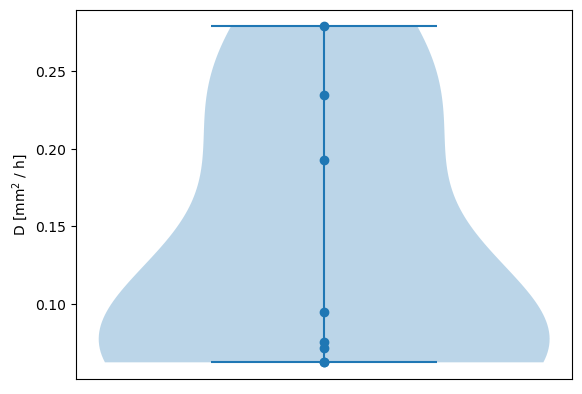

In [ ]:
plt.violinplot(resultsdf["D"], positions=[1,])
plt.scatter(np.ones_like(resultsdf["D"]), resultsdf["D"])

plt.xticks([])
plt.ylabel("D [mm$^2$ / h]")

plt.show()

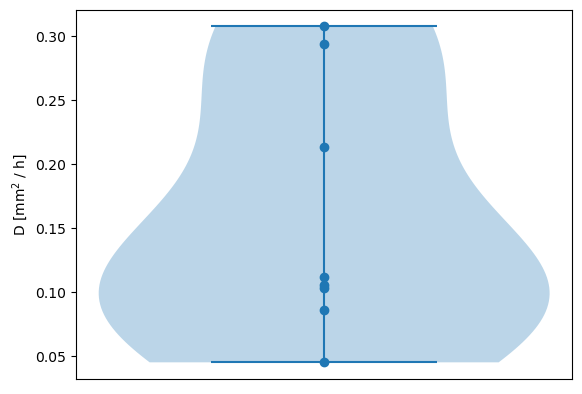

In [66]:
plt.violinplot(resultsdf["D"], positions=[1,])
plt.scatter(np.ones_like(resultsdf["D"]), resultsdf["D"])

plt.xticks([])
plt.ylabel("D [mm$^2$ / h]")

plt.show()

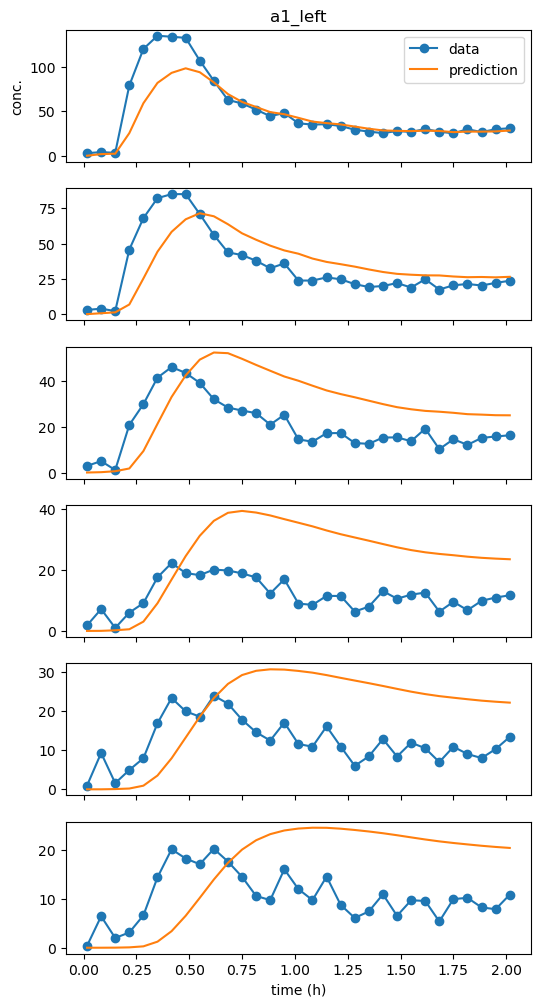

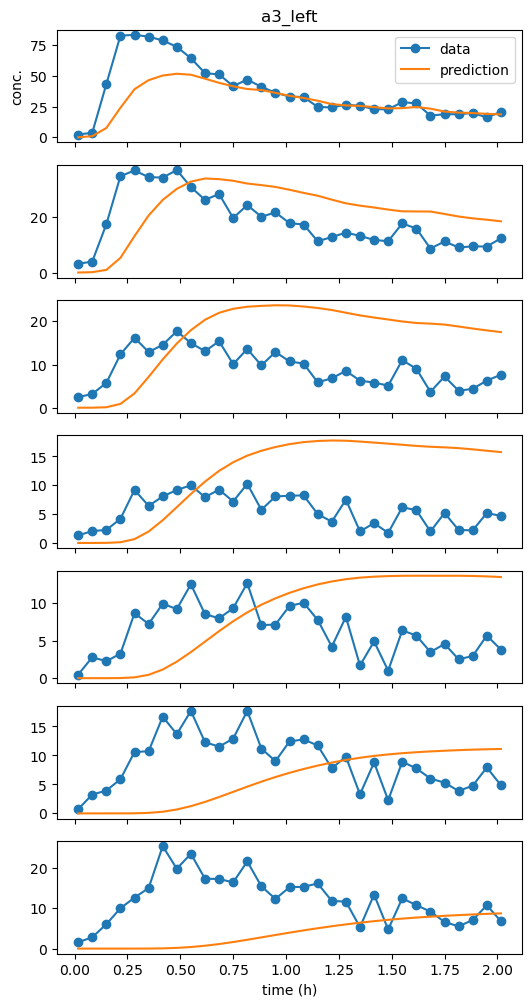

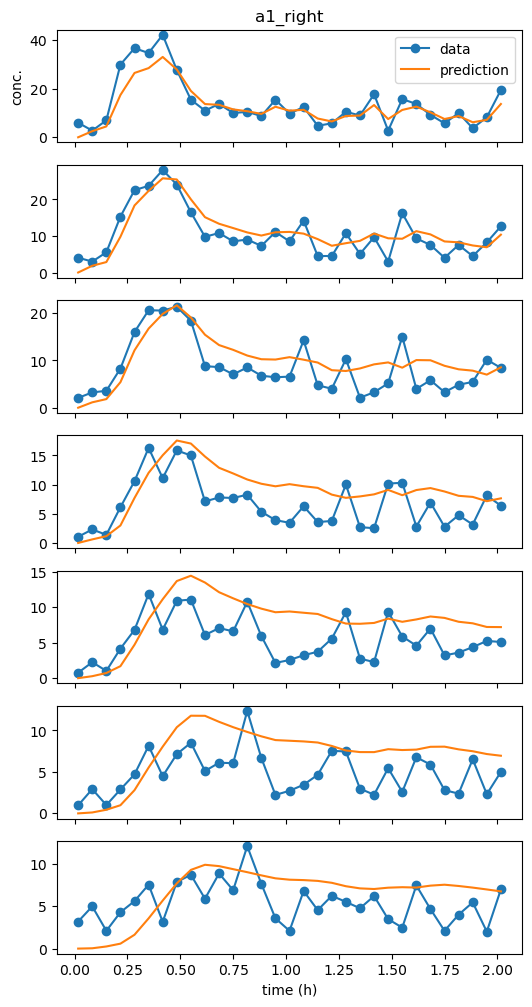

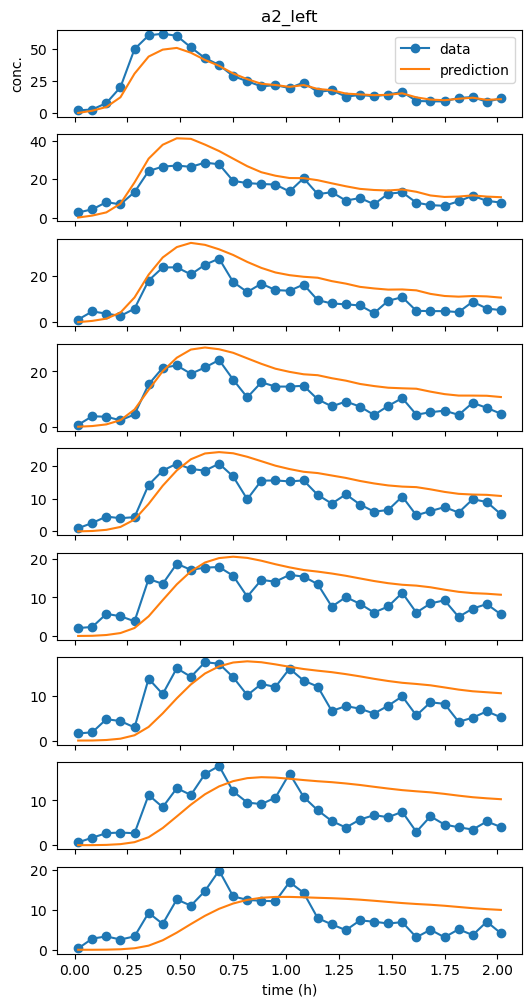

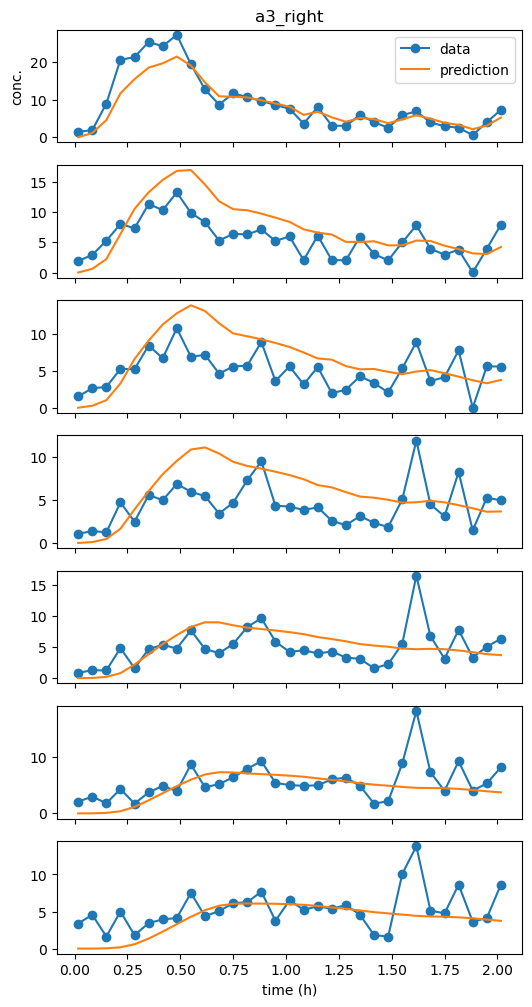

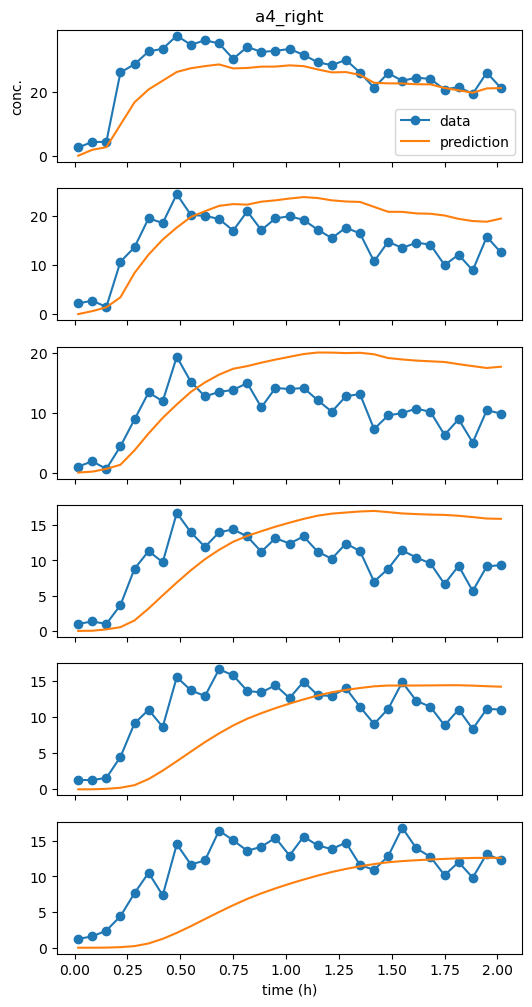

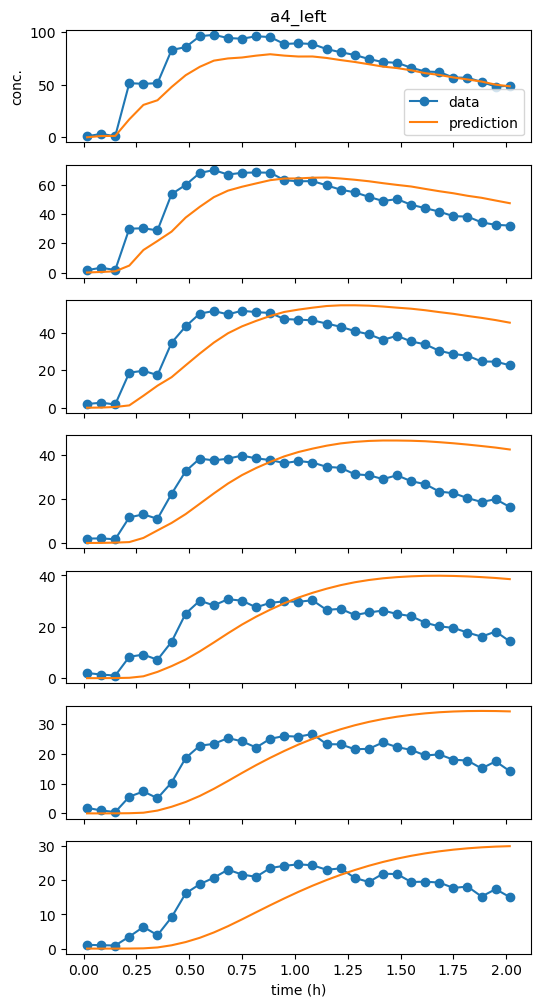

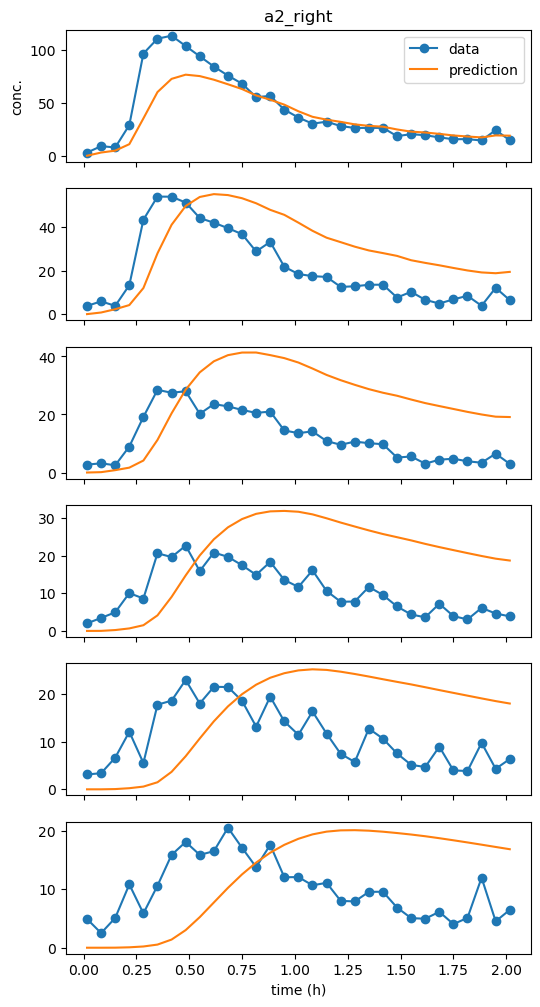

In [67]:
for ID, D in zip(resultsdf["ID"], resultsdf["D"]):
    cs.plot_compare_data_prediction(parseddatafolder + "TG_source/" + ID + '/', ID, D, 4, f'{resultsfolder + "TG_source"}/fitplots/{ID}.png')
    